In [18]:
# import flatsurf
# from flatsurf import *
# from flatsurf.geometry.similarity_surface_generators import *
# from flatsurf.geometry.polygon import polygons
# from sage.geometry.hyperbolic_space.hyperbolic_model import HyperbolicGeodesic
# from sage.geometry.hyperbolic_space.hyperbolic_model import moebius_transform
# from sage.plot.plot3d.shapes import *
# from sage.plot.plot3d.shapes2 import Line
# import time


# class Vertex:
#     r'''
#     A vertex object can be defined by either a complex number or a pair of
#     coordinates of norm <= 1. They represent a point in the UHP and Klein model
#     respectively. The 'get_field' option will tell the program to generate a
#     number field for the coordinate in the Klein model.
#     '''
#     def __init__(self, v, get_field = False):
#         self._v_km = None
#         self._v_uhp = None
#         if get_field:
#             self._v_km = generate_field(v)
#         else:
#             if type(v) == tuple:
#                 self._v_km = v
#             else:
#                 self._v_uhp = v
#                 self._v_km = point_UHP_to_KM(v)
        
#     def dist(self, other):
#         r'''
#         Returns the Euclidean distance from one point to another in KM.
#         '''
#         return sqrt((self.x() - other.x())**2 + (self.y() - other.y())**2)
            
#     def __rmul__(self, other):
#         r'''
#         This defines coordinate-wise multiplication.
#         '''
#         assert type(other) == Vertex
#         return Vertex((other * self.km()[0], other * self.km()[1]))
        
#     def __add__(self, other):
#         r'''
#         This defines coordinate-wise addition.
#         '''
#         return Vertex((self.x() + other.x(), self.y() + other.y()))
    
#     def __sub__(self, other):
#         r'''
#         This defines coordinate-wise subtraction.
#         '''
#         return Vertex((self.x() - other.x(), self.y() - other.y()))
    
#     def __neg__(self):
#         r'''
#         This defines the negative of a vertex object.
#         '''
#         return Vertex((-self.x(), -self.y()))
    
    
#     def __eq__(self, other):
#         r'''
#         For two vertex objects to be equal, they must represent the same point in KM or UHP.
#         '''
#         return (AA(self.x()), AA(self.y())) == (AA(other.x()), AA(other.y()))
    
#     @cached_method
#     def __hash__(self):
#         r'''
#         The hash is defined by the sum of the hashes of the x and y-coordinates in KM.
#         '''
#         return hash(AA(self.x())) + hash(AA(self.y()))
#     def km(self, approx = False):
#         if approx:
#             return (float(self.x()), float(self.y()))
#         return self._v_km
#     def uhp(self, approx = False):
#         if self._v_uhp:
#             if approx:
#                 return self._v_uhp.n()
#             return self._v_uhp
#         else:
#             self._v_uhp = point_KM_to_UHP(self.km())
#             if approx:
#                 return self._v_uhp.n()
#             return self._v_uhp
    
#     def x(self):
#         return self.km()[0]
#     def y(self):
#         return self.km()[1]
#     def norm(self):
#         r'''
#         Returns the Euclidean distance from (0, 0) to self.
#         '''
#         return self.km()[0]**2 + self.km()[1]**2
#     def plot(self, model = "UHP", axes = True, xmin = -2, xmax = 2, ymin = 0, ymax = 2, figsize = 30):
#         try:
#             if model == "UHP":
#                 g = HyperbolicPlane().UHP().get_point(self.uhp(approx = True), color = "red", size = 50)
#             else:
#                 g = HyperbolicPlane().KM().get_point(self.km(approx = True), color = "red", size = 50)
#             return g.show()
#         except AttributeError:
#             pass


# class Edge:
#     r'''
#     An edge object is represented by a pair of vertex objects. However, if
#     e1 = Edge(v1, v2) and
#     e2 = Edge(v2, v1).
#     We want them to be the same under ==.
#     '''
    
    
#     def __init__(self, v1, v2):
#         self._end_points = [v1, v2]
    
#     def e(self):
#         return self._end_points
#     def e_km(self, approx = False):
        
#         return self._end_points[0].km(approx = approx), self._end_points[1].km(approx = approx)
# #         return self._end_points[0].km(), self._end_points[1].km()
#     def e_uhp(self, approx = False):
#         r'''
#         The approx parameter is there for plotting.
#         '''
#         return self._end_points[0].uhp(approx = approx), self._end_points[1].uhp(approx = approx)
    
    
#     def __eq__(self, other):
#         return set(self.e()) == set(other.e())

#     @cached_method
#     def __hash__(self):
#         r'''
#         The hash of an edge is the sum of the hashes of its vertices.
#         '''
#         return hash(self._end_points[0]) + hash(self._end_points[1])
    
#     def plot(self, model = "UHP", axes = True, xmin = -2, xmax = 2,
#              ymin = 0, ymax = 2, figsize = 30, color = "blue"):
#         try:
#             if model == "UHP":
#                 g = HyperbolicPlane().UHP().get_geodesic(self.e_uhp(approx = True)[0],\
#                                                          self.e_uhp(approx = True)[1], color = color)
#                 return g.plot(axes = axes, xmin = xmin, xmax = xmax,\
#                                   ymin = ymin, ymax = ymax, figsize = figsize)
#             else:
#                 g = HyperbolicPlane().KM().get_geodesic(self.e_km(approx = True)[0],\
#                                                         self.e_km(approx = True)[1], color = color)
#                 return g.plot(axes = axes, xmin = -1, xmax = 1, ymin = -1, ymax = 1, figsize = figsize)
#         except AttributeError:
#             return None

        
        
# @cached_function
# def get_intersection(v1, v2, w1, w2):
#     r'''
#     Given four vertex objects, return the intersection of
#     two lines defined by v1, v2 and w1, w2, respectively.
#     '''
#     x1, y1 = v1.km()
#     x2, y2 = v2.km()
#     x3, y3 = w1.km()
#     x4, y4 = w2.km()
#     D = (x1-x2)*(y3-y4) - (y1-y2)*(x3-x4)
#     Px = (x1*y2-y1*x2)*(x3-x4) - (x1-x2)*(x3*y4-y3*x4)
#     Py = (x1*y2-y1*x2)*(y3-y4) - (y1-y2)*(x3*y4-y3*x4)
#     return Vertex((Px/D, Py/D), get_field = True)

# @cached_function
# def tri_center(v1, v2, v3):
#     r'''
#     Given three vertices, define a mobius map by
#     v1 |-> v2,
#     v2 |-> v3, and
#     v3 |-> v1.
#     Return the vertex object defined by the fixed point of
#     this mobius map such that the imaginary component is positive.
#     '''
    
#     center_of_0_1_inf = 1/2 + sqrt(3)/2 * I
#     L = [v1.uhp(), v2.uhp(), v3.uhp()]
#     if v2.uhp() == oo:
#         L = [v2.uhp(), v3.uhp(), v1.uhp()]
#     elif v3.uhp() == oo:
#         L = [v3.uhp(), v1.uhp(), v2.uhp()]
#     if oo in L: #we know L[0] == oo
#         f(x) = ((x-1)*L[2] + L[1]) / x
#     else:
#         f(x) = (L[0] * ((x-1)*L[2] + L[1]) - x*L[1]*L[2]) / (x*L[0] - (x-1)*L[1] - L[2])
#     return Vertex(f(center_of_0_1_inf), get_field = True)
        
        
        
        
        
# @cached_function
# def generate_field(v):
#     r'''
#     Given a complex number (UHP) or a pair of coordinates (KM),
#     return a pair of coordinates in KM where the coordinates
#     are in a number field.
#     '''
#     if type(v) != tuple:
#         v = point_UHP_to_KM(v)
#     tup = number_field_elements_from_algebraics([v[0], v[1]], embedded=True)
#     field = tup[0]
#     return (field(v[0]), field(v[1]))
        
# @cached_function
# def point_UHP_to_KM(z, approx = False):
#     if approx:
#         z = z.n()
#     if z == oo:
#         return (0, 1)
#     pairx = 2 * z.real() / (z.real()**2 + z.imag()**2 + 1)
#     pairy = (z.real()**2 + z.imag()**2 - 1) / (z.real()**2 + z.imag()**2 + 1)
#     return (pairx, pairy)

# @cached_function
# def point_KM_to_UHP(pair, approx = False):
#     if approx:
#         x, y = float(pair[0]), float(pair[1])
#         temp = 1 - x**2 - y**2
#         if temp <= 0:
#             return x / (1-y)
#         else:
#             return x / (1-y) + I*(sqrt(temp) / (1-y))
#     else:
#         x, y  = pair[0], pair[1]
#     if (x, y) == (0, 1):
#         return oo
#     return QQbar(x) / QQbar(1-y) + QQbar(I)*QQbar(sqrt(AA(1 - x**2 - y**2)) / QQbar(1-y))

# @cached_function
# def point_KM_to_float_UHP(pair):
#     x, y = pair[0], pair[1]
#     if (x, y) == (0, 1):
#         return oo
#     x, y = float(pair[0]), float(pair[1])
#     temp = 1 - x**2 - y**2
#     if temp <= 0:
#         return x / (1-y)
#     else:
#         return x / (1-y) + I*(sqrt(temp) / (1-y))

# @cached_function
# def get_edge_geo_ineq(s, x, no_geo = False): # x is of the form ((p0, e0), (p1, e1))
#     r'''
#     Given a surface s, and gluing data x, return the inequality
#     defined in Bowman's paper and the geodesic (edge object).
#     In particular, the inequality is a line in the KM (Bowman p.8, eq.2),
#     and the geodesic returned is the line in the UHP.
    
#     Note that the geodesic is not needed when we try to build an
#     IDR from a translation surface, hence the paramater 'no_geo'.
#     '''
#     # Below gives a polygon named 'new_polygon' defined by the four points
#     # obtained from the gluing data x.
#     P = Polygons(s.base_ring())
#     p0_label = x[0][0]
#     p1_label = x[1][0]
#     e0 = x[0][1]
#     e1 = x[1][1]
#     p0 = s.polygon(p0_label)
#     g = s.edge_transformation(p1_label, e1)
#     p1 = g(s.polygon(p1_label))
#     p0_moved = P(edges=[p0.edge((i + e0)%3) for i in range(3)])
#     p1_moved = P(edges=[p1.edge((i + e1 + 1)%3) for i in range(3)])
#     new_poly_e0 = p1_moved.edge(0)
#     new_poly_e1 = p1_moved.edge(1)
#     new_poly_e2 = p0_moved.edge(1)
#     new_poly_e3 = p0_moved.edge(2)
#     new_polygon = P(edges = (new_poly_e0, new_poly_e1, new_poly_e2, new_poly_e3))
#     p = new_polygon.vertices()
    
#     # Below defined a, b, c from Bowman's paper (p.8)
#     x0, y0, x1, y1, x2, y2, x3, y3 = p[0][0], p[0][1], p[1][0], p[1][1], p[2][0], p[2][1], p[3][0], p[3][1]
#     x0, y0, x1, y1, x2, y2, x3, y3 = 0, 0, (x1-x0), (y1-y0), (x2-x0), (y2-y0), (x3-x0), (y3-y0)
#     a = x1*y2*y3*(y3-y2) + x2*y1*y3*(y1-y3) + x3*y1*y2*(y2-y1)
#     b = x1*y1*(x2*y3-x3*y2) + x2*y2*(x3*y1-x1*y3) + x3*y3*(x1*y2-x2*y1)
#     c = x1*x2*y3*(x1-x2) + x2*x3*y1*(x2-x3) + x1*x3*y2*(x3-x1)
    
#     if no_geo:
#         geo = None
#     else:
#         try:
#             if a == 0 and b!= 0:
#                 v1 = Vertex(-c/(2*b), get_field = True)
#                 v2 = Vertex((0, 1))
#                 geo = Edge(v1, v2)
#             elif (a == 0 and b == 0) or (b**2 - a*c <= 0):
#                 geo = None
#             else:
#                 # r1 and r2 are the real points defining the geo in UHP
#                 r1 = ((-b + sqrt(b**2 - a*c)) / a)
#                 r2 = ((-b - sqrt(b**2 - a*c)) / a)
#                 v1 = Vertex(r1, get_field = True)
#                 v2 = Vertex(r2, get_field = True)
#                 geo = Edge(v1, v2)
#         except ZeroDivisionError as err:
#             print("/0 Error: {}".format(err))
#         except ValueError as err:
#             print("Value Error: {}".format(err))
#     # Returning a triple in the base_ring and a pair of points in QQbar.
#     return (a+c, 2*b, a-c), geo

# @cached_function
# def get_IDR_from_bowman(s):
#     r'''
#     This function returns most of the necessary data to define the
#     iso-Delaunay Region (IDR). Namely, edge_ineq_geo is a dictionary
#     where the key is a gluing data (represented by frozensets).
#     And the value is a triplet = (ineqality, geo, geo')
#     where inequality is given by the function get_edge_geo_ineq,
#     geo is a bounding geodesic of the IDR that contains s. And
#     geo' is geo extended to infinity.
#     '''
#     us = s.underlying_surface()
#     seen = set()
#     unique_edges = []
#     boundary_vertices = set()
#     for g in us.edge_gluing_iterator():
#         if g not in seen:
#             # g is the form ((a, b), (c, d)) where polygon a edge b is glued to polygon c edge d
#             unique_edges.append(g)
#         seen.add((g[0], g[1]))
#         seen.add((g[1], g[0]))
#     edge_ineq_geo = dict()
#     for x in unique_edges: # is of the form ((a, b), (c, d))
#         if type(s) == TranslationSurface:
#             ret = get_edge_geo_ineq(s, x, no_geo = True)
#         else:
#             ret = get_edge_geo_ineq(s, x) # return is (inequality, geo = frozenset(end points))
#         edge_ineq_geo[frozenset([x[0], x[1]])] = (ret[0], ret[1], None)
#         if ret[1]:
#             boundary_vertices.update(ret[1].e())
#     # edge_geo_ineq is of the form {edge: (ineq, geo)}
#     # we now wish to expand this edge_geo_ineq into the form
#     # {edge: (ineq, geo, geo')}
#     # where geo' is the actual edges of the IDR, if it does not exist, then it is simply None
#     all_inequalities = [x[0] for x in list(edge_ineq_geo.values())]
#     p = Polyhedron(ieqs=all_inequalities, base_ring=s.base_ring())
#     vertices = []
#     for v in boundary_vertices: # limit to circle and filter for uniqueness
#         in_IDR = True
#         for ineq in p.inequalities(): #inequality is of the form (c, a, b) = (ineq[0], ineq[1], ineq[2])
#             if not ineq[1]*v.x() + ineq[2]*v.y() + ineq[0] >= 0:
#                 in_IDR = False
#                 break
#         if in_IDR:
#             vertices.append(v)
#     for v in p.vertices():
#         if v.vector()[0]**2 + v.vector()[1]**2 <= 1:
#             vertices.append(Vertex((v.vector()[0], v.vector()[1])))
#     edges = []
#     vertices = list(set(vertices))
#     point_count = len(vertices)
#     shift_factor_x = 0
#     shift_factor_y = 0
#     for v in vertices:
#         shift_factor_x += v.x()
#         shift_factor_y += v.y()
#     shift_factor_x, shift_factor_y = shift_factor_x / point_count, shift_factor_y / point_count
#     vertices = [v - Vertex((shift_factor_x, shift_factor_y)) for v in vertices]
    
#     @cached_function
#     def angle_cmp(v, w): #is angle v < angle w?
#         v = v.x(), v.y()
#         w = w.x(), w.y()
#         def get_place(p):
#             if p == (0, 0):
#                 return 0
#             if p[0] > 0 and p[1] == 0:
#                 return 1
#             if p[0] > 0 and p[1] > 0:
#                 return 2
#             if p[0] == 0 and p[1] > 0:
#                 return 3
#             if p[0] < 0 and p[1] > 0:
#                 return 4
#             if p[0] < 0 and p[1] == 0:
#                 return 5
#             if p[0] < 0 and p[1] < 0:
#                 return 6
#             if p[0] == 0 and p[1] < 0:
#                 return 7
#             return 8
#         # --------------------------------
#         if v == w:
#             return 0
#         if v == (0, 0):
#             return 1
#         if w == (0, 0):
#             return -1

#         if get_place(v) < get_place(w):
#             return 1
#         elif get_place(v) > get_place(w):
#             return -1
#         else:
#             det = (v[0] * w[1]) - (w[0] * v[1])
#             if det > 0:
#                 return 1
#             elif det < 0:
#                 return -1
#             else:
#                 d1 = (v[0])**2 + (v[1])**2 
#                 d2 = (w[0])**2 + (w[1])**2
#                 if d1 < d2:
#                     return 1
#                 return -1
            
#     from functools import cmp_to_key
#     vertices = sorted(vertices, key=cmp_to_key(angle_cmp), reverse=True)
#     vertices = [v + Vertex((shift_factor_x, shift_factor_y)) for v in vertices]
#     for i in range(point_count - 1):
#         edges.append(Edge(vertices[i + 1], vertices[i]))
#     edges.append(Edge(vertices[0], vertices[point_count - 1]))
#     # 
#     def adding_good_edges(e):
#         # This function takes an edge e and updates the edge_ineq_geo dictionary.
#         # This can be optimized further to get rid of the repeated computation right below.
#         IV = e.e()[0]
#         TV = e.e()[1]          
#         for key, triplet in edge_ineq_geo.items():
#             ineq = triplet[0]
#             if ineq[0] + IV.x()*ineq[1] + IV.y()*ineq[2] == 0\
#                 and ineq[0] + TV.x()*ineq[1] + TV.y()*ineq[2] == 0:
#                 edge_ineq_geo[key] = (triplet[0], triplet[1], e)
                
#     for e in edges: #is of the form ((IV[0], IV[1]), (TV[0], TV[1]))
#         IV = e.e()[0]
#         TV = e.e()[1]
#         if (IV.norm() == 1 and TV.norm() == 1) and (IV != TV):
#             # this if statement checks for edges that go from boundary to boundary in KM,
#             # which means it can potentially be a free edge, in which case, we must find
#             # a inequality that goes straight through it, if there does exist such a line
#             # then we will pass it onto the 'adding_good_edges' function for further
#             # investigation.
#             for c, a, b in all_inequalities:
#                 if IV.x() * a + IV.y() * b + c == 0 and TV.x() * a + TV.y() * b + c == 0:
#                     adding_good_edges(e)
#                     break
#         else:
#             adding_good_edges(e)
#     return edge_ineq_geo, vertices


# @cached_function
# def mobius_eval(m, p):
#     r'''
#     This function takes a mobius map represented by a 2x2 matrix and acts on p.
#     Note: This is a right action, details given in Bowman p.5
#     '''
#     x = p[0]
#     y = p[1]
#     d, b = m[0]
#     c, a = m[1]
#     try:
#         if p == (0, 1):
#             if c != 0:
#                 r = Vertex(a/c).km()
#                 return (AA(r[0]), AA(r[1]))
#             else:
#                 return (AA(0), AA(1))
#         A_fraktur = AA(x / (1 - y))
#         B_fraktur = AA(sqrt(AA(1 - x**2 - y**2)) / (1 - y))
#         Real = ((a * A_fraktur + b)*(c*A_fraktur+d) + (a*B_fraktur)*(c*B_fraktur)) /\
#                 ((c*A_fraktur+d)**2 + (c*B_fraktur)**2)
#         Imag = ((c*A_fraktur+d)*(a*B_fraktur) - (a*A_fraktur+b)*(c*B_fraktur)) /\
#                 ((c*A_fraktur+d)**2 + (c*B_fraktur)**2)
#         retx = 2 * Real / (Real**2 + Imag**2 + 1)
#         rety = (Real**2 + Imag**2 - 1) / (Real**2 + Imag**2 + 1)
#         return (AA(retx), AA(rety))
#     except ZeroDivisionError:
#         return (AA(0), AA(1))
    
    
    
    



# @cached_function
# def IDR_veech_distinct(TD, R1, R2):
#     r'''
#     This function tests if two IDRs named R1 and R2 are Veech distinct given a
#     TeichmullerDisk.
#     '''
    
#     s = TD.defining_surface()
    
#     # 1. If hash or number of vertices differ, we have different surfaces, return 1 for distinct.
#     if len(R1.vertices()) != len(R2.vertices()) or hash(R1) != hash(R2):
#         return 1
    
#     # if the function did not return at this point, must be same hash, same num of vertices
#     # There might be a hash collision however, which we can check more carefully below.
    
#     if R1.is_degenerate() and R2.is_degenerate():
#         # If the vertices of R1 and R2 all lie on the boundary, then we need "pseudo vertices" for
#         # the purpose of obtaining surfaces from R1 and R2
#         R1_points = R1.pseudo_vertices()
#         R2_points = R2.pseudo_vertices()
#     else:
#         R1_points = R1.vertices()
#         R2_points = R2.vertices()
    
    
#     # The dictionary below is keyed by surfaces, and values are vertex objects which
#     # goes to that surface under TeichmullerDisk.surface(v)
#     surf_vert_dict = dict()
#     for v in R1_points:
#         try:
#             surf = TD.surface(v, new_field = AA)
#             if surf and (surf not in surf_vert_dict):
#                 surf_vert_dict[surf] = (set([v]), set())
#             elif surf:
#                 surf_vert_dict[surf][0].add(v)
#         except AttributeError:
#             pass
#     # If while getting set_2, we see a brand new surface (this may happen if there was a hash collision)
#     # then we return 1, for distinct.
#     for v in R2_points:
#         try:
#             surf = TD.surface(v, new_field = AA)
#         except AttributeError:
#             pass
#         if surf and (surf not in surf_vert_dict):
#             return 1
#         elif surf:
#             surf_vert_dict[surf][1].add(v)
    
#     # Now we attempt to map from R1 to R2 by a symmetry of the surface, if sucessful, then we will
#     # return map, otherwise, R1 and R2 are distinct, dispite the fact that they have the surfaces.
#     v2_AA = set((AA(v.km()[0]),AA(v.km()[1])) for v in R2.vertices())
#     for set_pair in surf_vert_dict.values():
#         for v1 in set_pair[0]:
#             for v2 in set_pair[1]:
#                 m1 = TD.matrix(v1)
#                 m2 = TD.matrix(v2)
#                 s1, ders1 = (m1 * s).canonicalize(group = 'similarity', derivatives=True)
#                 s2, ders2 = (m2 * s).canonicalize(group = 'similarity', derivatives=True)
#                 R1_to_R2 = False
#                 mats = set()
#                 for der1 in ders1:
#                     for der2 in ders2:
#                         try:
#                             mat = matrix(~m1*~der1*der2*m2)
#                             mat = matrix(s.base_ring(), mat, immutable = True)
#                             mats.add(mat)
#                         except TypeError as t:
#                             print(t)
#                 veech_generator = None
#                 for mat in mats:
#                     v1_img = set(mobius_eval(mat, v.km()) for v in R1.vertices())
#                     if v1_img == v2_AA:
#                         veech_generator = mat
#                         R1_to_R2 = True
#                         break
#                 if R1_to_R2:
#                     if veech_generator == matrix(s.base_ring(), [[1, 0], [0, 1]]):
#                         print("Identity matrix should not be here")
#                         print([v.uhp() for v in R1_points])
#                         print([v.uhp() for v in R2_points])
#                     return 0, veech_generator
#     return 1

In [19]:
# class TeichmullerDisk:
#     r'''
#     A TeichmullerDisk object is defined by a surface.
#     '''
#     def __init__(self, surface):
#         self._s = surface.canonicalize()
#         self._s.set_immutable()
#     def defining_surface(self):
#         return self._s
#     @cached_method
#     def matrix(self, p):
#         if type(p) != tuple:
#             p = p.km()
#         root = sqrt(AA(1-p[0]**2-p[1]**2))
#         x = p[0]
#         y = p[1]
#         assert root.parent()==AA
#         try:
#             x = self._s.base_ring()(x)
#             y = self._s.base_ring()(y)
#             root = self._s.base_ring()(root)
#             field = self._s.base_ring()
#         except (TypeError, ValueError):
#             tup = number_field_elements_from_algebraics([root, self._s.base_ring().gen(), x, y], embedded=True)
#             field = tup[0]
#             x = field(x)
#             y = field(y)
#             root = tup[1][0]
#         return matrix(field, [[1, field(x/(1-y))],\
#                               [0, root/field(1-y)]], immutable = True)
#     @cached_method
#     def surface_from_matrix(self, m):
#         return (m*self._s).canonicalize(group='similarity') 
    
#     @cached_method
#     def surface(self, p, derivatives = False, new_field = None):
#         r'''
#         Returns the surface associated with p, which can either be a vertex object, or
#         a pair of coordinates in KM.
#         '''
#         try:
#             m = self.matrix(p)
#         except ZeroDivisionError:
#             return None
#         if m:
#             try:
#                 ms = m * self._s
#             except ValueError as err:
#                 return None
#             ret = ms.canonicalize(group='similarity', derivatives=derivatives)
#             if new_field:
#                 ret = ret.copy(new_field = new_field)
#             ret.set_immutable()
#             return ret

    
# class IDC:
#     r'''
#     An IDC object is defined by a surface and a number n, serving as the upper bound
#     of the number of IDRs we will look at before stopping.
#     The 'veech' option will determine if we should search for symmetries or not.
#     The 'show_current_sym' will determine if the program will print the generators
#     as they're found.
#     '''
#     def __init__(self, s, n, veech = True, show_current_sym = False):
#         # Below we need to find a shearing that takes the surface to a
#         # triangulation. Once that is done, we undo the shearing while keeping
#         # the triangulation.
#         self._shear = matrix([[1, 0], [0, 1]], immutable = True)
#         if not (self._shear * s).delaunay_decomposition().is_triangulated():
#             for i in range(0, 100):
#                 shear = matrix([[1, 1/(100 - i)], [0, 1]], immutable = True)
#                 if (shear * s).delaunay_decomposition().is_triangulated():
#                     self._shear = shear
#                     break
#         self._defining_surface = ~self._shear * ((self._shear * s).canonicalize())
#         self._td = TeichmullerDisk(self._defining_surface)
#         self._regions = [IDR(~self._shear * ((self._shear * s).canonicalize()),\
#                              self._defining_surface, self._td)]
#         self._surf_ver_dict = dict()
#         self._generators = set()
#         self._queue = None
#         self._edge_complete = dict()
#         self._counter = 0
#         # If 'veech == True', then we initialize self._surf_ver_dict, a dictionary keyed
#         # by surfaces with values being sets of vertices that go to the key under TD.
#         if veech:
#             for v in self.IDRs()[0].vertices():
#                 if v.norm() == 1:
#                     continue
#                 surf = self._td.surface(v)
#                 if surf:
#                     key = surf.copy(new_field = AA)
#                     key.set_immutable()
#                     surf.set_immutable()
#                     if key not in self._surf_ver_dict:
#                         self._surf_ver_dict[key] = (surf, set([v]))
#                     else:
#                         self._surf_ver_dict[key][1].add(v)
#         # We manually check if -I is a symmetry, this will help filtering out
#         # redundent elements, which is currently not perfect.
#         self._neg_I_is_sym = False
#         if (matrix(s.base_ring(), [[-1, 0], [0, -1]]) * s).canonicalize() == s.canonicalize():
#             self._generators.add(matrix(s.base_ring(), [[-1, 0], [0, -1]], immutable = True))
#             self._neg_I_is_sym = True
#         self.expand_IDR(n, veech = veech, show_current_sym = show_current_sym)
        
    
#     def generators(self, normalize_det = False):
#         r'''
#         Returns the generators of the Veech (sub)group that the program found.
#         The 'normalize_det' option will further filter the generators up to
#         +-inverse, and factors of -I if applicable. One is likely to get a
#         smaller set with 'normalized_det' when dealing with dilation surfaces.
#         '''
#         normalized_generators = set()
#         if normalize_det:
#             for g in self._generators:
#                 gen = matrix(g / sqrt(g.det()), immutable = True)
#                 gen_inv = matrix(~g, immutable = True)
#                 neg_gen = matrix(matrix([[-1, 0], [0, -1]]) * g, immutable = True)
#                 neg_gen_inv = matrix(matrix([[-1, 0], [0, -1]]) * gen_inv, immutable = True)
#                 if self._neg_I_is_sym:
#                     if (gen not in normalized_generators) and (gen_inv not in normalized_generators)\
#                         and (neg_gen not in normalized_generators) and (neg_gen_inv not in normalized_generators):
#                         normalized_generators.add(gen)
#                 else:
#                     if (gen not in normalized_generators) and (gen_inv not in normalized_generators):
#                         normalized_generators.add(gen)
#             return normalized_generators
#         else:
#             return self._generators
#         return self._generators
#     def pre_shear(self):
#         r'''
#         Returns the shearing that takes the input surface to a triangulation.
#         '''
#         return self._shear
#     def IDRs(self, index = None):
#         r'''
#         Returns either all of the IDRs as a list, or a particular one at a given 'index'.
#         '''
#         if index != None:
#             return self._regions[index]
#         return self._regions
#     def surface(self):
#         r'''
#         Returns the input surface canonicalized, or triangulated + canonicalized,
#         if the surface is degenerate.
#         '''
#         return self._defining_surface
#     def surf_ver_dict(self):
#         r'''
#         Returns the dictionary with key = surface, value = set of vertices, that
#         go to the key under TeichmullerDisk(input surface).
#         '''
#         return self._surf_ver_dict
#     def TeichmullerDisk(self):
#         r'''
#         Returns TeichmullerDisk of the input surface.
#         '''
#         return self._td
#     def expand_IDR(self, n, veech, show_current_sym = False):
#         r'''
#         This function constructs the IDRs for self.IDRs(). It also computes
#         the generators 'self.generators()' if 'veech == True'.
#         '''
#         n = n + self._counter
#         seen_vertex = set()
#         continue_from_queue = False
#         # If there is no queue, then we initialize it.
#         if not self._queue:
#             print('Previous queue not found.')
#             self._queue = [self.IDRs()[0]]
#             for edge in self._queue[0].unique_geodesics().keys():
#                 self._edge_complete[edge] = False
#         else:
#             n += 1
#             if veech:
#                 self._counter -= 1
#         starttime = time.time()
        
        
#         while True:
#             # Gets the first element of the queue, if there is an index error, then
#             # it must be that 'veech == True', and that the program has terminated.
#             try:
#                 curr_IDR = self._queue.pop(0)
#             except IndexError:
#                 endtime = time.time()
#                 print("IDR {}/{} --> {} seconds".format(self._counter + 1, n, round((endtime - starttime) * 100) / 100))
#                 print("Veech terminated")
#                 break
#             curr_surf = curr_IDR.surface()
#             # Loops through all the edges of the current surface, and tries to cross the edges of
#             # the IDR.
#             for edge, glue_to_flip in curr_IDR.unique_geodesics().items():
#                 if not self._edge_complete[edge]:
#                     if self._counter + 1 == n:
#                         endtime = time.time()
#                         self._queue.insert(0, curr_IDR)
#                         print("IDR {}/{} --> {} seconds".format(n, n, round((endtime - starttime) * 100) / 100))
#                         return 0
#                     else:
#                         print("IDR {}/{}".format(self._counter + 1, n), end="\r")
#                     self._counter += 1
#                     curr_surf_flipped = curr_surf
#                     # This does the necessary flippings, so that the IDR defined by 'new_IDR' will be adjacent
#                     # to the 'curr_IDR'.
#                     for glue in glue_to_flip:
#                         to_flip = next(iter(glue))
#                         curr_surf_flipped = curr_surf_flipped.triangle_flip(to_flip[0], to_flip[1])
#                     new_IDR = IDR(curr_surf_flipped, self.surface(), self._td)
#                     if veech:
#                         # If 'veech == True', then whenever we find an IDR, we must check it against
#                         # all of the previous ones to determine if it is Veech-equivalent to any
#                         # of the them. If so, then we will not add it to the queue.
#                         distinct = True
#                         for region in self.IDRs():
#                             # For all regions in self.IDRs(), some of them need not be compared to the
#                             # 'new_IDR'. More precisely, the ones with all "neighborhoods" discovered can
#                             # be skipped.
#                             should_check = False
#                             for edge in region.unique_geodesics().keys():
#                                 if not self._edge_complete[edge]:
#                                     should_check = True
#                                     break
#                             if should_check:
#                                 ret = IDR_veech_distinct(self.TeichmullerDisk(), region, new_IDR)
#                                 if type(ret) == tuple:
#                                     gen = ret[1]
#                                     gen_inv = matrix(self.surface().base_ring(), ~ret[1], immutable = True)
#                                     neg_gen = matrix(self.surface().base_ring(), matrix([[-1, 0], [0, -1]]) * gen, immutable = True)
#                                     neg_gen_inv = matrix(self.surface().base_ring(), matrix([[-1, 0], [0, -1]]) * gen_inv, immutable = True)
#                                     if self._neg_I_is_sym:
#                                         if (gen not in self._generators) and (gen_inv not in self._generators)\
#                                             and (neg_gen not in self._generators) and (neg_gen_inv not in self._generators):
#                                             self._generators.add(gen)
#                                             if show_current_sym:
#                                                 show(gen)
#                                     else:
#                                         if (gen not in self._generators) and (gen_inv not in self._generators):
#                                             self._generators.add(gen)
#                                             if show_current_sym:
#                                                 show(gen)
#                                     distinct = False
#                         # If the 'new_IDR' is distinct, we add it to the queue.
#                         if distinct:
#                             for v in new_IDR.vertices():
#                                 if v.norm() == 1 or v in seen_vertex: 
#                                     continue
#                                 surf = self._td.surface(v)
#                                 if surf:
#                                     key = surf.copy(new_field = AA)
#                                     key.set_immutable()
#                                     surf.set_immutable()
#                                     if key not in self._surf_ver_dict:
#                                         self._surf_ver_dict[key] = (surf, set([v]))
#                                     else:
#                                         self._surf_ver_dict[key][1].add(v)
#                                 seen_vertex.add(v)
#                             self._regions.append(new_IDR)
#                             self._queue.append(new_IDR)
                        
#                             for ee in new_IDR.unique_geodesics().keys():
#                                 if ee not in self._edge_complete:
#                                     self._edge_complete[ee] = False
#                                 else:
#                                     self._edge_complete[ee] = True
                            
#                     else: # If 'veech' is not true, we add all the 'new_IDR's to the queue.
#                         self._edge_complete[edge] = True
#                         self._queue.append(new_IDR)
#                         self._regions.append(new_IDR)
#                         self._edge_complete[edge] = True
#                         for ee in new_IDR.unique_geodesics().keys():
#                             if ee not in self._edge_complete:
#                                 self._edge_complete[ee] = False
#                             else:
#                                 self._edge_complete[ee] = True
                                
                    
#     def plot(self, axes = True, model = "UHP", xmin = -2, xmax = 2, ymin = 0, ymax = 2,\
#              figsize = 30, pseudo = 0):
#         r'''
#         This function plots the IDC with various options. In particular,
#         pseudo = 0 means we don't plot any pseudo edges/vertices,
#         pseudo = 1 means we plot pseudo vertices,
#         pseudo = 2 means we plot pseudo edges, and
#         pseudo = 3 means we plot pseudo vertices and edges.
#         '''
#         starttime = time.time()
#         q = plot(1000, axes = axes, xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, figsize = figsize)
#         end = len(self._regions)
#         counter = 0
#         for x in self.IDRs():
#             print("Plot IDR {}/{}".format(counter, end), end = '\r')
#             counter += 1
#             q += x.plot(model = model, axes = axes, xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax,\
#                         figsize = figsize, pseudo = pseudo)
            
#         endtime = time.time()
#         print("Plot IDR {}/{} --> {} seconds".format(counter, end, round((endtime - starttime) * 100) / 100), end = '\r')
#         return q
    
    
#     def bounding_IDRs(self, v):
#         r'''
#         Given a vertex object, return all the IDRs that contains v in
#         its interior/boundary.
#         '''
#         boundings = set()
#         counter = 0
#         for R in self.IDRs():
#             if R.contains_vertex(v):
#                 boundings.add((R, counter))
#             counter += 1
#         return boundings
    
#     def vertices(self):
#         r'''
#         Returns the set of all vertices that were found.
#         '''
#         ret = set()
#         for IDR in self.IDRs():
#             ret.update(IDR.vertices())
#         return ret
    

    
# class IDR:
#     r'''
#     An IDR object is defined by a surface, it is also efficient to store
#     the surface should it be a part of some IDC that we're trying to compute,
#     called the 'parent_s'. It also stores the TeichmullerDisk 'parent_td' if applicable.
#     '''
#     def __init__(self, s, parent_s = None, parent_td = None):
#         self._defining_surface = s
#         self._defining_surface.set_immutable()
#         self._parent_IDC_surface = parent_s
#         self._parent_td = parent_td
#         self._ret = get_IDR_from_bowman(self._defining_surface)
#         self._unique_geodesics = self.construct_unique_geodesics()
#         self._pseudo_v = None
#     def parent_IDC_surface(self):
#         return self._parent_IDC_surface
#     def __eq__(self, other):
#         r'''
#         Two IDRs are the same when they have the same vertices, regardless of permutation.
#         '''
#         return set(self.vertices()) == set(other.vertices())
#     @cached_method
#     def __hash__(self, custom_TD = None):
#         r'''
#         The hash is defined by the sum of the hashes of the surfaces at the
#         vertices. The 'custom_TD' option will allow us to compare IDRs when
#         they're not from the same IDC.
#         '''
#         ret = 0
#         if custom_TD:
#             TD = custom_TD
#         else:
#             TD = self._parent_td
#         for v in self.vertices():
#             if v.norm() < 1:
#                 try:            
#                     ret += hash(TD.surface(v).copy(new_field = AA))
#                 except AttributeError:
#                     pass
#         return int(ret)
#     def IDR_dict(self):
#         r'''
#         Returns 'edge_ineq_geo' from the 'get_IDR_from_bowman' function.
#         '''
#         return self._ret[0]
#     def surface(self):
#         r'''
#         Returns the defining surface of the IDR (not the parent surface).
#         '''
#         return self._defining_surface
#     def vertices(self):
#         r'''
#         Returns vertices from the 'get_IDR_from_bowman' function.
#         '''
#         return self._ret[1]
#     def unique_geodesics(self):
#         r'''
#         Returns a dictionary where key = geodesics (edge object)
#         and values are gluing data that is necessary to travel
#         across the key.
#         '''
#         return self._unique_geodesics
    
#     def has_free_edge(self):
#         r'''
#         Returns if the IDR has a free edge or not.
#         '''
#         return (len(self._unique_geodesics.keys()) < len(vertices))
            
#     def is_degenerate(self):
#         r'''
#         Returns 'True' only when there is a vertex in the interior of the KM,
#         and 'False' otherwise.
#         '''
        
#         for v in self.vertices():
#             if v.norm() < 1:
#                 return False
#         return True
    
#     @cached_method
#     def contains_vertex(self, v):
#         r'''
#         Tests if 'self' contains a particular vertex object v in its interior/boundary.
#         '''
#         q = Polyhedron(vertices=[w.km() for w in self.vertices()],
#                        base_ring=AA)
#         return q.contains(v.km())
        
    
#     @cached_method
#     def pseudo_vertices(self):
#         r'''
#         Returns the pseudo vertices:
#         If the IDR has 3 edges: pseudo vertices is the singleton consisting of the fixed
#         point of the mobius map that rotates the vertices.
        
#         If the IDR has >3 edges: pseudo vertices is the set of vertices obtained by intersecting
#         geodesics defined from the i'th and i+2'th vertex and from the i+1'th and i+3'th vertex
#         for all possible i.
        
#         This function asserts the IDR to be degenerate.
#         '''
#         if not self.is_degenerate():
#             return []
#         if self._pseudo_v:
#             return self._pseudo_v
        
#         ver = self.vertices()
#         pse_ver = []
#         num_vertices = len(ver)
#         if num_vertices > 3:
#             for i in range(num_vertices):
#                 pse_ver.append(get_intersection(ver[i], ver[(i + 2) % num_vertices],\
#                                             ver[(i + 1) % num_vertices], ver[(i + 3) % num_vertices]))
#         else:
#             pse_ver.append(tri_center(ver[0], ver[1], ver[2]))
#         self._pseudo_v = pse_ver
#         return pse_ver
#     @cached_method
#     def pseudo_edges(self):
#         r'''
#         Returns the pseudo edges.
#         If the IDR has 3 edges: pseudo edges = empty list.
#         If the IDR has >3 edges: pseudo edges are the geodesics defined by the i'th vertex
#         to the i+2'th vertex for all possible i.
        
#         This function asserts the IDR to be degenerate.
#         '''
        
#         if not self.is_degenerate():
#             return []
#         ver = self.vertices()
#         num_vertices = len(ver)
#         pse_edg = []
#         if num_vertices == 3:
#             return []
#         for i in range(num_vertices):
#             pse_edg.append(Edge(ver[i], ver[(i + 2) % num_vertices]))
#         return pse_edg
    
#     def construct_unique_geodesics(self):
#         r'''
#         This function constructs 'self._unique_geodesics'.
#         '''
#         ret = dict()
#         unique_geos = set([value[2] for value in self.IDR_dict().values() if value[2]])
            
#         for geo in unique_geos:
#             edge_cross = []
#             for key, value in self.IDR_dict().items():
#                 try:
#                     if geo == value[2]:
#                         edge_cross.append(key)
#                 except AttributeError:
#                     pass
#             ret[geo] = list(set(edge_cross))
#         return ret

#     def plot(self, n = 2, axes = True, model = "UHP", xmin = -2, xmax = 2, ymin = 0, ymax = 2,\
#              figsize = 30, pseudo = 0):
#         q = plot(1000, axes = axes, xmin = xmin, xmax = xmax,\
#                  ymin = ymin, ymax = ymax, figsize = figsize)
#         r'''
#         This function plots the IDR with various options. In particular,
#         pseudo = 0 means we don't plot any pseudo edges/vertices,
#         pseudo = 1 means we plot pseudo vertices,
#         pseudo = 2 means we plot pseudo edges, and
#         pseudo = 3 means we plot pseudo vertices and edges.
#         '''
#         if pseudo == 3:
#             for e in self.pseudo_edges():
#                 q += e.plot(model = model, axes = axes, xmin = xmin, xmax = xmax,\
#                           ymin = ymin, ymax = ymax, figsize = figsize, color = 'red')
#             for v in self.pseudo_vertices():
#                 q += v.plot(model = model, axes = axes, xmin = xmin, xmax = xmax,\
#                           ymin = ymin, ymax = ymax, figsize = figsize)
#         elif pseudo == 2:
#             for e in self.pseudo_edges():
#                 q += e.plot(model = model, axes = axes, xmin = xmin, xmax = xmax,\
#                           ymin = ymin, ymax = ymax, figsize = figsize, color = 'red')
#         elif pseudo == 1:
#             for v in self.pseudo_vertices():
#                 q += v.plot(model = model, axes = axes, xmin = xmin, xmax = xmax,\
#                           ymin = ymin, ymax = ymax, figsize = figsize)
#         for key in self.unique_geodesics().keys():
#             q += key.plot(model = model, axes = axes, xmin = xmin, xmax = xmax,\
#                           ymin = ymin, ymax = ymax, figsize = figsize)
#         return q

In [20]:
# t = EquiangularPolygons(2,3,4).an_element()
# t0 = t
# t1 = matrix([[1, 0],[0,-1]])*t0
# sl = Surface_list(t.base_ring())
# sl.add_polygon(t0)
# sl.add_polygon(t1)
# sl.change_edge_gluing(0, 0, 1, 2)
# sl.change_edge_gluing(0, 1, 1, 1)
# sl.change_edge_gluing(0, 2, 1, 0)
# sl.change_base_label(0)
# sl.set_immutable()
# cs = ConeSurface(sl)
# for e in range(3):
#     ee = cs.opposite_edge(0, e)[1]
# ts = cs.minimal_cover().copy(relabel=True)
# tri234 = ts.canonicalize()
    


# def deformed_square_surface(a, b, c, d):
#     s = Surface_list(base_ring=QQ)
#     a = vector(QQ, a)
#     b = vector(QQ, b)
#     c = vector(QQ, c)
#     d = vector(QQ, d)
#     P = Polygons(QQ)
#     CP = ConvexPolygons(QQ)
#     hexagon = CP(edges=[2*a, 2*b-c, -d, -a, 2*c-b, 2*d])
#     s.add_polygon(hexagon)
#     s.change_base_label(0)
#     triangle1 = CP(edges=[-c, 2*b, c-2*b])
#     s.add_polygon(triangle1)
#     triangle2 = CP(edges=[b-2*c, 2*c, -b])
#     s.add_polygon(triangle2)
#     s.change_edge_gluing(0, 0, 0, 3)
#     s.change_edge_gluing(0, 2, 0, 5)
#     s.change_edge_gluing(0, 1, 1, 2)
#     s.change_edge_gluing(0, 4, 2, 0)
#     s.change_edge_gluing(1, 0, 2, 1)
#     s.change_edge_gluing(1, 1, 2, 2)
#     s.set_immutable()
#     ds = DilationSurface(s)
#     TestSuite(s).run()
#     TestSuite(ds).run()
#     return ds

# from flatsurf import *
# from flatsurf.geometry.surface import Surface_list

# def genus_one_square(a, b, c, d):
#     r"""A genus one dilation surface is returned.
    
#     The unit square is made into an octagon by marking a point on 
#     each of its edges. Then opposite sides of this octagon are 
#     glued together by translation. The parameters $a$, $b$, $c$,
#     and $d$ should be real numbers strictly between zero and one.
#     These represent the lengths of an edge of the resulting octagon,
#     as depicted below. 
#              c
#        +--+-------+
#      d |2/        |
#        |/         |
#        +    0     +
#        |         /|
#        |        /1| b
#        +-------+--+
#           a
#     The other edges will have length $1-a$, $1-b$, $1-c$, and $1-d$.
#     Dilations used to glue edges will be by factors $c/a$, $d/b$,
#     $(1-c)/(1-a)$ and $(1-d)/(1-b)$.
#     """
#     field = Sequence([a, b, c, d]).universe().fraction_field()
#     s = Surface_list(base_ring=QQ)
#     CP = ConvexPolygons(field)
#     hexagon = CP(edges=[(a,0), (1-a,b), (0,1-b), (-c,0), (c-1,-d), (0,d-1)])
#     s.add_polygon(hexagon) # polygon 0
#     s.change_base_label(0)
#     triangle1 = CP(edges=[(1-a,0), (0,b), (a-1,-b)])
#     s.add_polygon(triangle1) # polygon 1
#     triangle2 = CP(edges=[(1-c,d), (c-1,0), (0,-d)])
#     s.add_polygon(triangle2) # polygon 2
#     s.change_edge_gluing(0, 0, 2, 1)
#     s.change_edge_gluing(0, 2, 2, 2)
#     s.change_edge_gluing(0, 1, 1, 2)
#     s.change_edge_gluing(0, 4, 2, 0)
#     s.change_edge_gluing(1, 0, 0, 3)
#     s.change_edge_gluing(1, 1, 0, 5)
#     s.set_immutable()
#     ds = DilationSurface(s)
#     return ds


# from flatsurf import *
# from flatsurf.geometry.surface import Surface
# from flatsurf.geometry.similarity import SimilarityGroup


# class SpiralSurface(Surface):
#     def __init__(self, field, c, p0, p1, n):
#         """The parameter c should be an expanding 2x2 matrix"""
#         if not field.is_field():
#             field = field.fraction_field()
#         self._field = field
#         self._M = MatrixSpace(field, 2, 2)
#         self._c = self._M(c)
#         self._ci = ~self._c
#         self._V = VectorSpace(field, 2)
#         self._p0 = self._V(p0)
#         self._p1 = self._V(p1)
#         self._n = n
#         self.rename(f'Spiral surface with parameters {self._c}, {self._p0}, {self._p1}')
#         self._minus_I = - self._M.one()
#         self._P = ConvexPolygons(field)
#         self._G = SimilarityGroup(field)
#         Surface.__init__(self, field, ZZ(0), finite=True)

#     @cached_method
#     def position_function(self):
#         @cached_function
#         def translation_vector(lab):
#             if lab == 0:
#                 return self._p0
#             if lab %2 == 1:
#                 return - translation_vector(lab-1)
#             if lab > 0:
#                 return self._c * translation_vector(lab-2)
#             if lab < 0:
#                 return self._ci * translation_vector(lab+2)
#         def pf(lab):
#             return self._G(1, 0, *translation_vector(lab))
#         return pf
        
#     @cached_method
#     def polygon(self, lab):
#         if lab == 0:
#             v0 = self._p0
#             v1 = self._p1
#             v2 = self._c * v1
#             v3 = self._c * v0
#             return self._P(edges = [v1-v0,v2-v1,v3-v2,v0-v3])
#         if lab % 2 == 1:
#             return self._minus_I * self.polygon(lab-1)
#         if lab > 0:
#             # lab is even and positive
#             return self._c * self.polygon(lab-2)
#         else:
#             # lab is even and negative
#             return self._ci * self.polygon(lab+2)

#     def opposite_edge(self, p, e):
#         if p % 2 == 0:
#             # p is even
#             if e == 0:
#                 return (p-2)%(2*self._n), 2
#             if e == 1:
#                 return (p+1)%(2*self._n), 1
#             if e == 2:
#                 return (p+2)%(2*self._n), 0
#             assert e==3, 'e should be 0, 1, 2 or 3'
#             return (p+1)%(2*self._n), 3
#         else:
#             # p is odd
#             if e == 0:
#                 return (p-2)%(2*self._n), 2
#             if e == 1:
#                 return (p-1)%(2*self._n), 1
#             if e == 2:
#                 return (p+2)%(2*self._n), 0
#             assert e==3, 'e should be 0, 1, 2 or 3'
#             return (p-1)%(2*self._n), 3
       
    
    
# c = ~matrix([
#     [1/2, -1/2],
#     [1/2,  1/2]
# ]).transpose()
# p0 = vector((1, 0))
# #p1 = c**8 * p0
# p1 = -c**4 * p0
# s = SpiralSurface(QQ, c, p0, p1, 8)
# TestSuite(s).run(skip='_test_override')
# ds = DilationSurface(s)
# TestSuite(ds).run(skip='_test_underlying_surface')
# spiral1 = ds.copy(relabel=True)
        
    
# c = ~matrix([
#     [1/2, -1/2],
#     [1/2,  1/2]
# ]).transpose()
# p0 = vector((1, 0))
# p1 = vector((2, 0))
# s = SpiralSurface(QQ, c, p0, p1, 8)
# TestSuite(s).run(skip='_test_override')
# ds = DilationSurface(s)
# TestSuite(ds).run(skip='_test_underlying_surface')
# spiral2 = ds.copy(relabel=True)


# c = ~matrix([
#     [1/2, -1/2],
#     [1/2,  1/2]
# ]).transpose()
# p0 = vector((1, 0))
# p1 = vector((6, 0))
# s = SpiralSurface(QQ, c, p0, p1, 8)
# TestSuite(s).run(skip='_test_override')
# ds = DilationSurface(s)
# TestSuite(ds).run(skip='_test_underlying_surface')
# spiral3 = ds.copy(relabel=True)


# c = ~matrix([
#     [0, -1/2],
#     [1,  0]
# ]).transpose()
# p0 = vector((1, 0))
# #p1 = c**8 * p0
# p1 = -c**2 * p0
# s = SpiralSurface(QQ, c, p0, p1, 4)
# TestSuite(s).run(skip='_test_override')
# ds = DilationSurface(s)
# TestSuite(ds).run(skip='_test_underlying_surface')
# spiral4 = ds.copy(relabel=True)


# c = ~matrix([
#     [3/2, -1],
#     [3/4,  0]
# ]).transpose()
# p0 = vector((1, 0))
# # p1 = vector((2, 0))
# p1 = -c**6 * p0
# s = SpiralSurface(QQ, c, p0, p1, 12)
# TestSuite(s).run(skip='_test_override')
# ds = DilationSurface(s)
# TestSuite(ds).run(skip='_test_underlying_surface')
# spiral5 = ds.copy(relabel=True)


# c = ~matrix([
#     [1, -1],
#     [1,  0]
# ]).transpose()
# c *= 3/2
# p0 = vector((1, 0))
# # p1 = vector((2, 0))
# p1 = -c**3 * p0
# s = SpiralSurface(QQ, c, p0, p1, 6)
# TestSuite(s).run(skip='_test_override')
# ds = DilationSurface(s)
# TestSuite(ds).run(skip='_test_underlying_surface')
# spiral6 = ds.copy(relabel=True)


# c = ~matrix([
#     [-1, -1],
#     [1,  0]
# ]).transpose()
# c *= 2
# p0 = vector((1, 0))
# # p1 = vector((2, 0))
# p1 = c**3 * p0
# s = SpiralSurface(QQ, c, p0, p1, 3)
# TestSuite(s).run(skip='_test_override')
# ds = DilationSurface(s)

# TestSuite(ds).run(skip='_test_underlying_surface')
# spiral7 = ds.copy(relabel=True)

In [21]:
import flatsurf
from flatsurf import *
from flatsurf.geometry.similarity_surface_generators import *
from flatsurf.geometry.polygon import polygons
from sage.geometry.hyperbolic_space.hyperbolic_model import HyperbolicGeodesic
from sage.geometry.hyperbolic_space.hyperbolic_model import moebius_transform
from sage.plot.plot3d.shapes import *
from sage.plot.plot3d.shapes2 import Line
import time

In [22]:
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# # # # # # #                                         # # # # # # #
# # # # # # #             Dimple Surface              # # # # # # # 
# # # # # # #                                         # # # # # # #
# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

In [23]:
# Search for Veech group of Dimple surface under different parameters

def search_dimple(x,y):
    s = Surface_list(QQ)

#     x = 1/2
#     y = 2

        
    p0 = (0,0)
    p1 = (1,0)
    p2 = (1,y)
    p3 = (0,y)
    
    q0 = (x,0)
    q1 = (1,0)
    q2 = (1,x)
    q3 = (1,1)
    q4 = (x,x)
    
    r0 = (0,x)
    r1 = (x,x)
    r2 = (1,1)
    r3 = (x,1)
    r4 = (0,1)


    P1 = polygons(vertices = [p0,p1,p2,p3])
    Q1 = polygons(vertices = [q0,q1,q2,q3,q4])
    R1 = polygons(vertices = [r0,r1,r2,r3,r4])


    s.add_polygon(P1)
    s.add_polygon(Q1)
    s.add_polygon(R1)


    S = SimilaritySurface(s)

    s.set_edge_pairing(0,0,2,3)
    s.set_edge_pairing(0,1,1,4)
    s.set_edge_pairing(0,2,2,0)
    s.set_edge_pairing(0,3,1,1)
    s.set_edge_pairing(1,0,2,2)
    s.set_edge_pairing(1,2,2,4)
    s.set_edge_pairing(1,3,2,1)

    gs = S.graphical_surface()

    gs.make_adjacent(1,2)
    gs.make_adjacent(0,1)
    gs.plot()

    DS = S.minimal_cover(cover_type='dilation').copy(relabel=True)
    return DS, S, s
#     show(S.plot())
#     print('Square size: (' + str(x) + ',' + str(x) + ')')
#     print('Rect size:   (1,' + str(y) + ')')
#     IDC1 = IDC(DS, 10000, veech = 1, show_current_sym = 1) # Change 1 to > 100
#     show(IDC1.plot(model = 'UHP', figsize = 10)) #UHP or KM
#     show(list(IDC1.generators(normalize_det=1)))


In [46]:
DS,S,s = search_dimple(1/2,2)

In [47]:
S.graphical_surface(cached=False,edge_labels='letter').plot()
TestSuite(S).run()

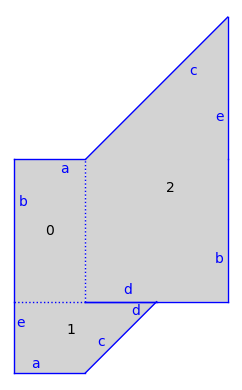

In [48]:
DS.plot(edge_labels='letter')

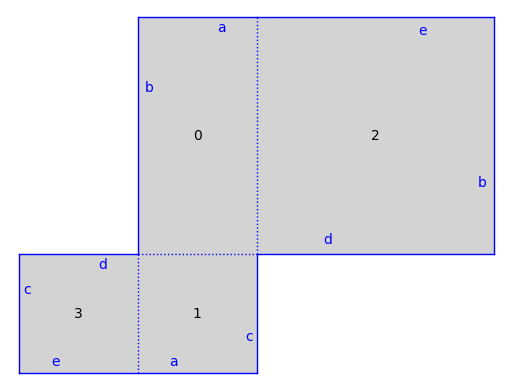

In [49]:
cDS = DS.canonicalize()
cDS.plot(edge_labels='letter')

In [79]:
A = matrix([[-1, 0],
            [0, -1]])

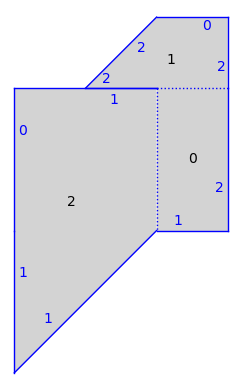

In [90]:
(A*DS).plot()

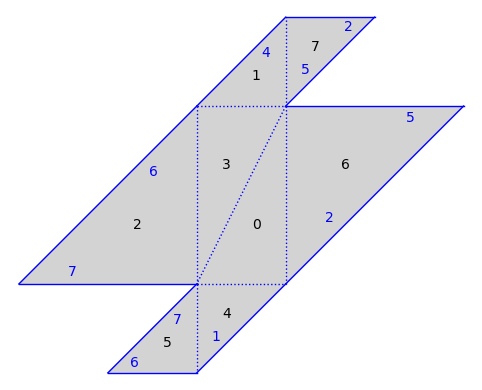

In [89]:
(A*DS).delaunay_triangulation().plot()

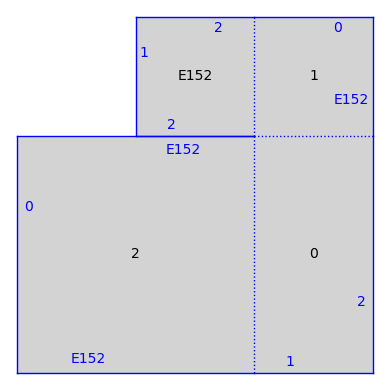

In [88]:
(A*DS).delaunay_decomposition().plot()

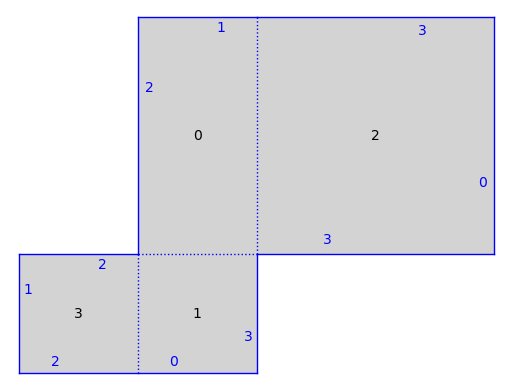

In [87]:
(A*DS).canonicalize().plot()

In [100]:
# Why are these all not equal? Especially #1?
print(DS.canonicalize() == DS)
print((A*DS).delaunay_triangulation() == DS.delaunay_triangulation())
print((A*DS).delaunay_decomposition() == DS.delaunay_decomposition())

False
False
False


False

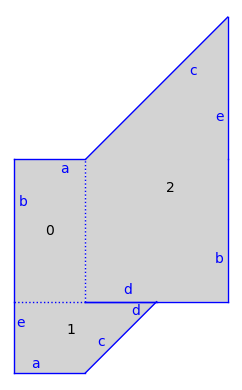

In [55]:
DS.plot()

closed: False
saddle: True


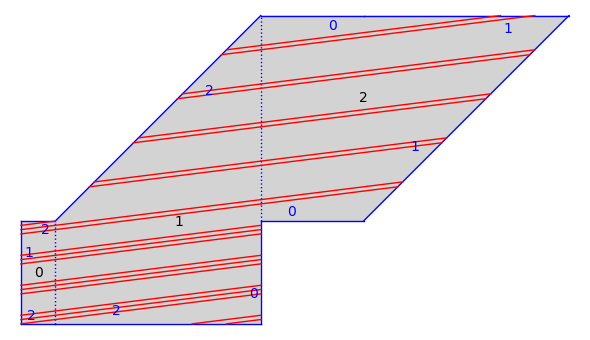

In [34]:
v = S.tangent_vector(0, (0,0), (8,1))
traj = v.straight_line_trajectory()
traj.flow(100)
print('closed: ' + str(traj.is_closed()))
print('saddle: ' + str(traj.is_saddle_connection()))
S.plot() + traj.plot(color='red')